# Energy calibration for clovers

quick utilities to calibrate a HPGe crystal using a 152Eu and/or 60Co.

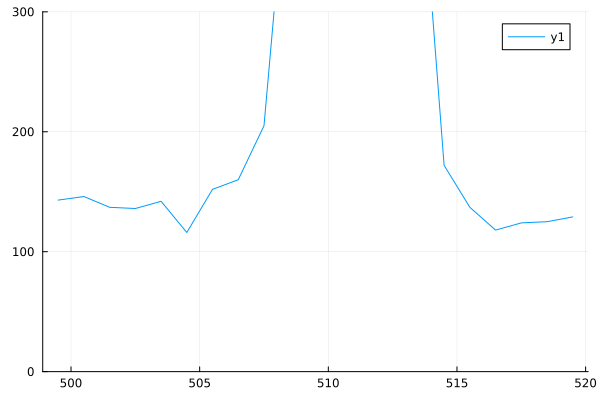

In [64]:
using Plots,DelimitedFiles,LsqFit

his=readdlm("betaGatedGamma.dat")

# display(his[:,2])

plot(his[:,2],seriestype=:step,xlims=(0,2000))

bins = his[:,1]; counts = his[:,2]

peaks = [511,988]

inits = peaks.-3
ends = peaks.+3

plot(bins[500:520],counts[500:520],ylims=(0,300))

Defining gaussian function and fit

[511.02187795331616, 1.3457407247015958, 8202.931799606198]

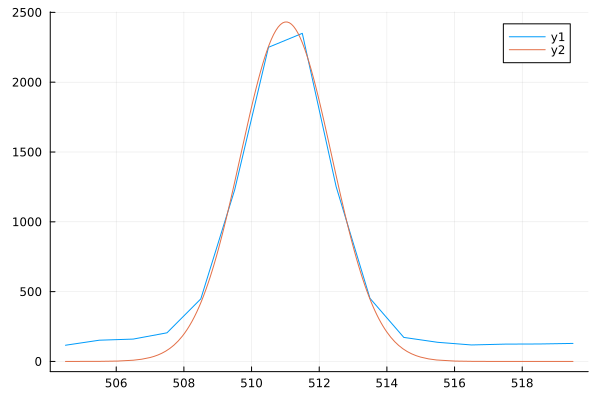

In [65]:
function gaussian_plus_constant(x, params)
    μ, σ, Area #=, c =# = params
    A = Area / (σ * sqrt(2π))
    return A * exp.(-(x .- μ).^2 / (2σ^2)) #.+ c
end

initial_params = [500, 1.5, 2000#=, 200=#]

init = 505
ending = 520

fit = curve_fit(gaussian_plus_constant, bins[init:ending], counts[init:ending], initial_params) 
# fit = curve_fit(gaussian_plus_constant,hbins,hcounts,[20,1,2,0])
print(fit.param)
plot(bins[init:ending],counts[init:ending])
plot!(x->gaussian_plus_constant(x,fit.param))

now let's try for multiple peaks

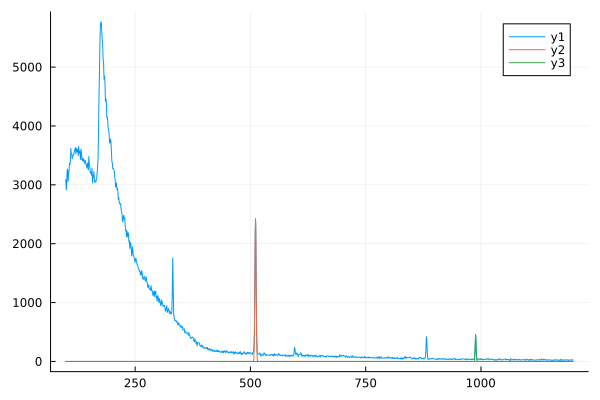

In [66]:
peaks = [500,980]
fits=[]
for i in peaks
    init=i-20
    ending=i+20
    params = [i,1.5,1000]
    push!(fits,curve_fit(gaussian_plus_constant,bins[init:ending],counts[init:ending],params))
end

fplot=plot(bins[100:1200],counts[100:1200])
for i in fits
    fplot=plot!(x->gaussian_plus_constant(x,i.param))
end

display(fplot)

now we do a linear regression of the points to calculate the calibration

In [72]:
energies=[511,988]
x=[]
for i in fits; push!(x,i.param[1]); end
linear(x,p0) = p0[1].*x.+p0[2]
lr=curve_fit(linear,x,energies,[1.1,0])
lr.param



2-element Vector{Float64}:
 0.9992068352081567
 0.38344667761081525